Import libraries, load data, show head of data

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("T1.csv")
df["Date/Time"] = pd.to_datetime(df["Date/Time"])
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


Show info of data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


Show statistics of data

In [3]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


Check if there is any missing data

In [4]:
df.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

Visualise data - pairplot

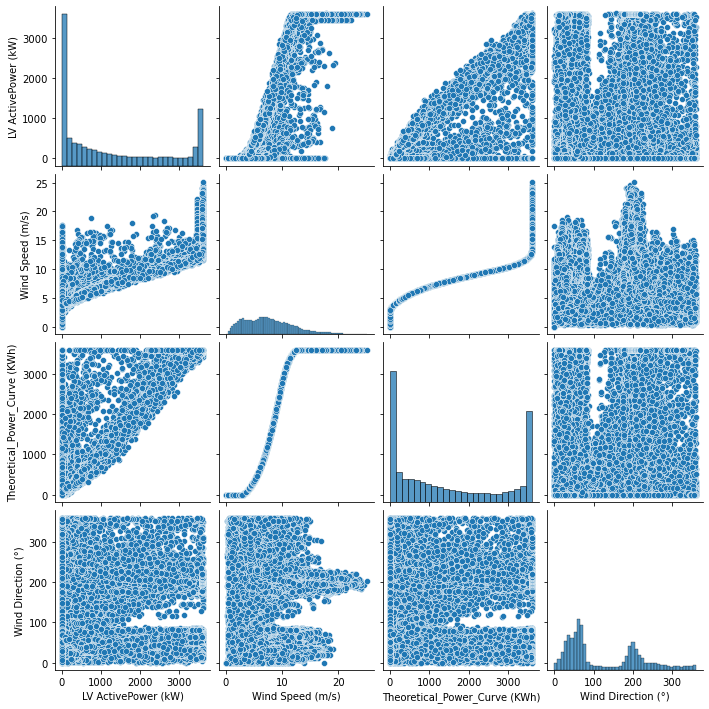

In [5]:
sns.pairplot(df)

Correlation of data

<AxesSubplot:>

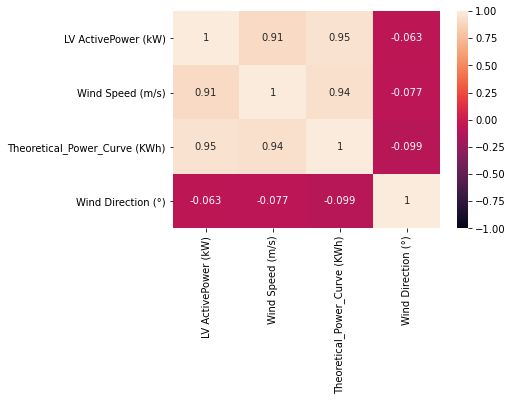

In [6]:
corr = df.corr()
sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)

Install library
https://windrose.readthedocs.io/en/latest/usage.html

In [7]:
! pip install windrose

Radial scale is % of time

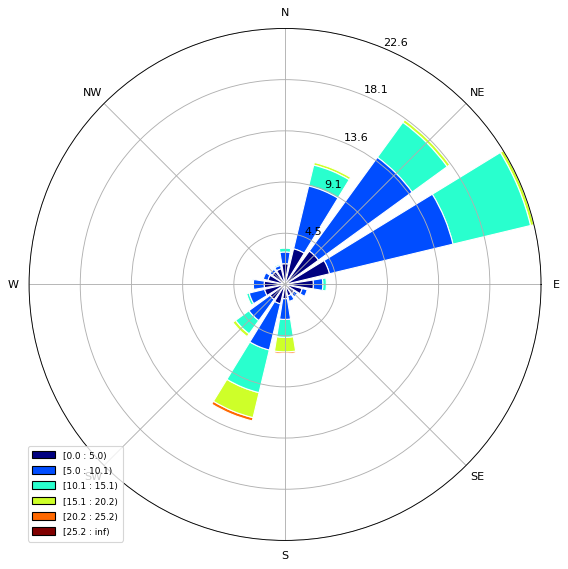

In [8]:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df["Wind Direction (°)"], df["Wind Speed (m/s)"], normed=True, opening=0.8, edgecolor='white')
ax.set_xticklabels(['E', 'NE', 'N', 'NW',  'W', 'SW', 'S', 'SE'])
ax.set_legend()

<AxesSubplot:ylabel='Frequency'>

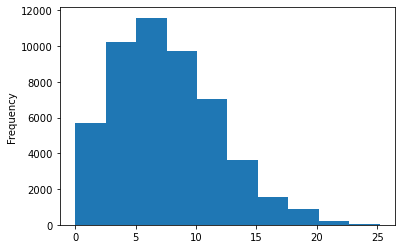

In [9]:
df["Wind Speed (m/s)"].plot.hist()

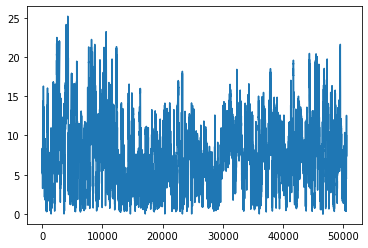

In [10]:
plt.plot(df["Wind Speed (m/s)"])

Check stationarity - Augmented Dickey-Fuller unit root test

In [80]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["Wind Speed (m/s)"][:8640])
print('ADF Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' %(key, value))

ADF Statistic: -6.292337
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary
The more negative ADF statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset.
ADF Statistic value is less than -3.43 (value at 1%). This suggests that we can reject the null hypothesis with a significance level of less than 1%.

Conclusion - time series is stationary, there's no need to integrate it, d=0

Check autocorrelation

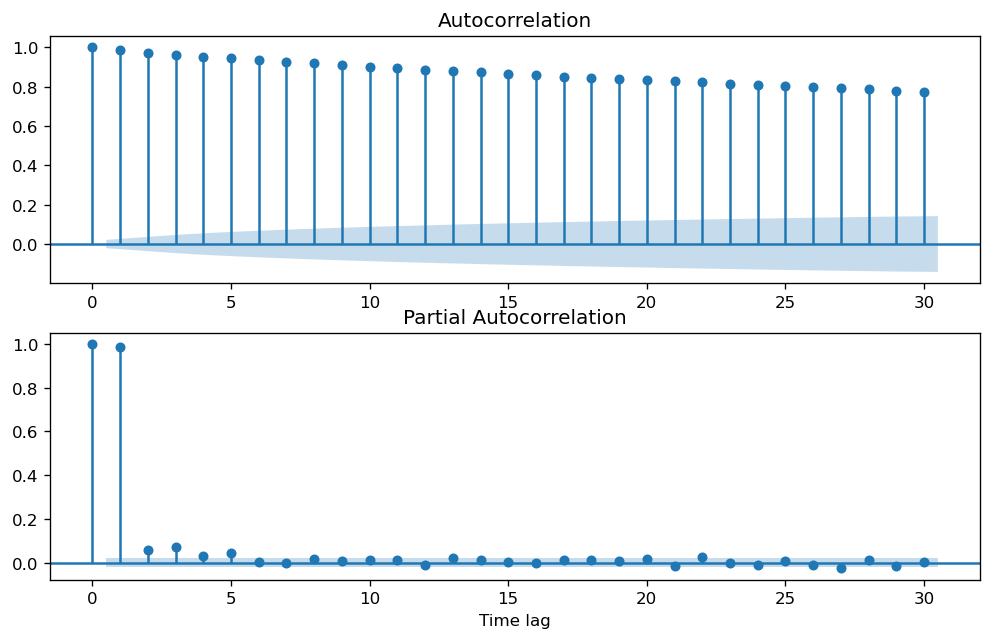

In [88]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = plot_acf(df["Wind Speed (m/s)"][:8640], lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df["Wind Speed (m/s)"][:8640], lags=30, ax=ax2)
plt.xlabel('Time lag')
plt.show()

In [103]:
# plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# data = df["Wind Speed (m/s)"][:8640]
# # Original Series
# fig, axes = plt.subplots(3, 2, sharex=True)
# axes[0, 0].plot(data); axes[0, 0].set_title('Original Series')
# plot_acf(data, ax=axes[0, 1])

# If the time series is not stationary, differencing is needed

# # 1st Differencing
# axes[1, 0].plot(data.diff()); axes[1, 0].set_title('1st Order Differencing')
# plot_acf(data.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(data.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(data.diff().diff().dropna(), ax=axes[2, 1])

# plt.show()

Divide data to train and test sets (80% / 20%)

In [198]:
X = df["Wind Speed (m/s)"]
train = X[0:8640] #8640 data as train - 2 months
test = X[8640:8688] #48 data as test (8h)

C:\Users\konra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


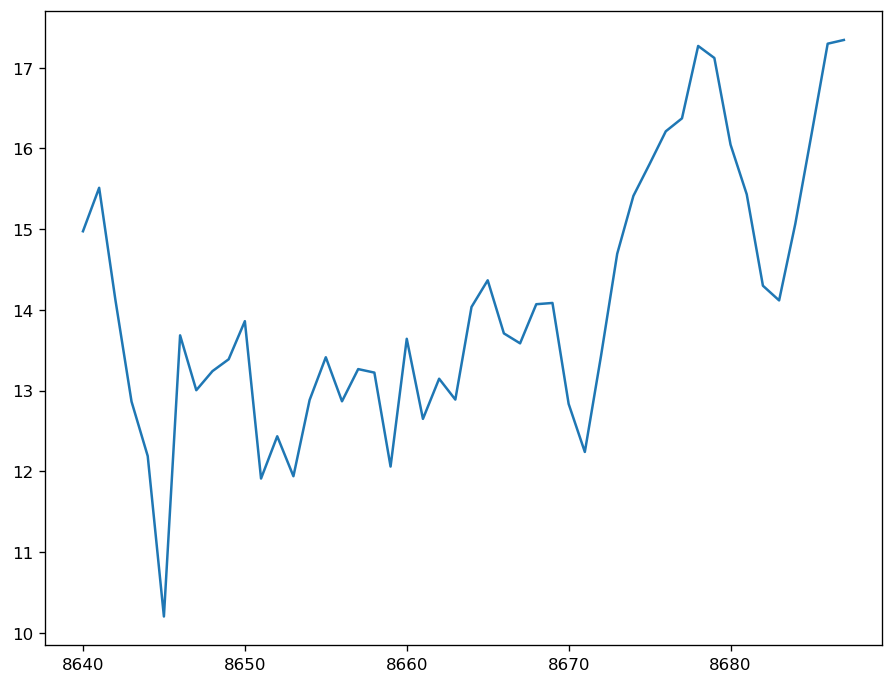

In [199]:
# p - number of periods taken for AR 
# d - order of integration
# q - number of periods taken for MA
from statsmodels.tsa.arima_model import ARIMA
pdq = (1,0,3) # order
model = ARIMA(train, order=pdq)
model_fit = model.fit()
plt.plot(test)

<Figure size 600x240 with 0 Axes>

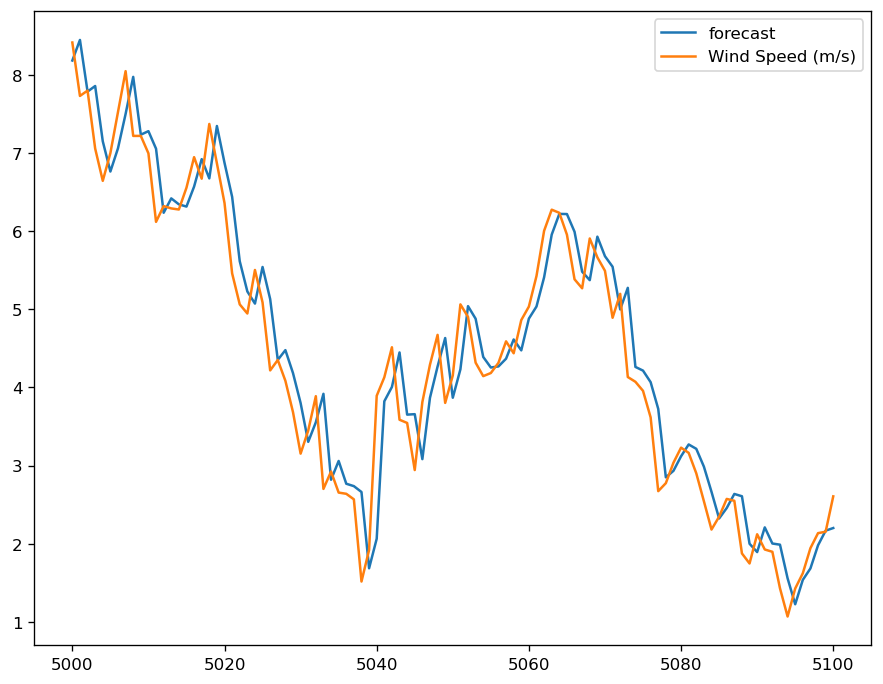

In [200]:
plt.figure(figsize=(5,2))
model_fit.plot_predict(start=5000, end=5100, dynamic=False)
plt.show()

In [201]:
fc, se, conf = model_fit.forecast(steps=48, alpha=0.05)
print(fc)

[15.17095749 15.21280337 15.18929525 15.1278961  15.06709268 15.00687922
 14.94724998 14.8881993  14.82972157 14.77181122 14.71446276 14.65767072
 14.60142971 14.54573439 14.49057945 14.43595967 14.38186983 14.32830481
 14.27525951 14.22272888 14.17070794 14.11919174 14.06817538 14.01765401
 13.96762282 13.91807707 13.86901205 13.82042308 13.77230555 13.72465488
 13.67746655 13.63073607 13.584459   13.53863093 13.49324752 13.44830444
 13.40379743 13.35972225 13.31607472 13.27285068 13.23004602 13.18765668
 13.14567863 13.10410788 13.06294046 13.02217248 12.98180006 12.94181935]


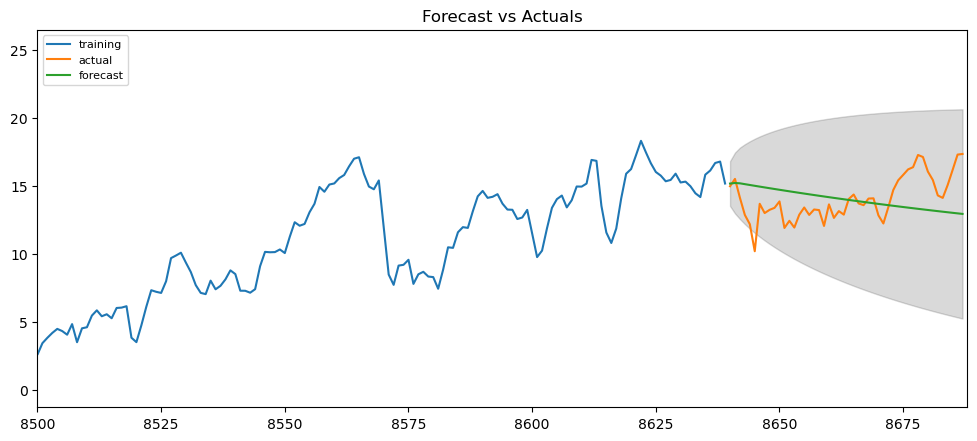

In [202]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.xlim(8500,8688)
plt.show()

In [203]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test)

<ipython-input-203-652ffcd974cb>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-203-652ffcd974cb>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


{'mape': 0.12243634624378197,
 'me': -0.014586028052643973,
 'mae': 1.7206130914781765,
 'mpe': 0.015321609080870019,
 'rmse': 2.106461550421757,
 'corr': -0.6289742198399572,
 'minmax': 0.11201618994912665}

In [204]:
train = X[0:8640] #8640 data as train - 2 months
test = X[8640:8784] #144 data as test (24h)
model = ARIMA(train, order=pdq)
model_fit = model.fit()
fc, se, conf = model_fit.forecast(steps=144, alpha=0.05)
forecast_accuracy(fc,test)

C:\Users\konra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
<ipython-input-203-652ffcd974cb>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future vers

{'mape': 0.2979390873854051,
 'me': -4.890972802431982,
 'mae': 5.459648490240494,
 'mpe': -0.25201976894385436,
 'rmse': 6.2439466808747435,
 'corr': -0.7831403172581025,
 'minmax': 0.29446570195385335}

In [205]:
train = X[0:8640] #8640 data as train - 2 months
test = X[8640:8664] #24 data as test (4h)
model = ARIMA(train, order=pdq)
model_fit = model.fit()
fc, se, conf = model_fit.forecast(steps=24, alpha=0.05)
forecast_accuracy(fc,test)

C:\Users\konra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
<ipython-input-203-652ffcd974cb>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future vers

{'mape': 0.12941528411978068,
 'me': 1.57766944750217,
 'mae': 1.6026741914636713,
 'mpe': 0.12780341219668517,
 'rmse': 1.8762825508308825,
 'corr': 0.23529964824326235,
 'minmax': 0.10924945846190603}

In [206]:
train = X[0:8640] #8640 data as train - 2 months
test = X[8640:8646] #6 data as test (1h)
model = ARIMA(train, order=pdq)
model_fit = model.fit()
fc, se, conf = model_fit.forecast(steps=6, alpha=0.05)
forecast_accuracy(fc,test)

C:\Users\konra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
<ipython-input-203-652ffcd974cb>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future vers

{'mape': 0.16510970222105986,
 'me': 1.8173174570936252,
 'mae': 1.9173364329396312,
 'mpe': 0.1586622145286779,
 'rmse': 2.5084243555458547,
 'corr': 0.9685157440944274,
 'minmax': 0.12716127463981108}

In [207]:
train = X[0:1000] #1000 data as train - 1 week
test = X[1000:1024] #24 data as test (4h)
model = ARIMA(train, order=pdq)
model_fit = model.fit()
fc, se, conf = model_fit.forecast(steps=24, alpha=0.05)
forecast_accuracy(fc,test)

C:\Users\konra\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
<ipython-input-203-652ffcd974cb>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future vers

{'mape': 0.07653625091821749,
 'me': 0.30418375595083613,
 'mae': 0.5105346803437029,
 'mpe': 0.050201279012203205,
 'rmse': 0.6640672878831988,
 'corr': 0.3977604336335772,
 'minmax': 0.06778810020380888}